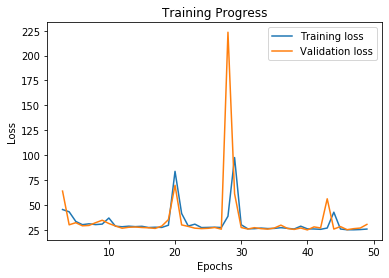

In [2]:
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_tensorflow_log(path):

    # Loading too much data is slow...
#     tf_size_guidance = {
#         'compressedHistograms': 10,
#         'images': 0,
#         'scalars': 100,
#         'histograms': 1
#     }
    #event_acc = EventAccumulator(path,tf_size_guidance)
    event_acc = EventAccumulator(path)
    event_acc.Reload()

    #Show all tags in the log file
    # print(event_acc.Tags())

    loss =   event_acc.Scalars('loss')
    val = event_acc.Scalars('val_loss')
    # gr = event_acc.Graph()
    # print(gr)
    # print(val)
    #print(loss[0])
   
    x = np.arange(len(loss))
    y_loss=[]
    y_val=[]

    for i in range(len(loss)):
        y_loss.append(loss[i][2])
        y_val.append(val[i][2])
    # print(x)
    plt.plot(x[3:],y_loss[3:], label='Training loss')
    plt.plot(x[3:],y_val[3:], label='Validation loss')

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Progress")
    plt.legend(loc='upper right', frameon=True)
    plt.show()


log_file = "logs\events.out.tfevents.1601538322.b7r6ru27"
plot_tensorflow_log(log_file)